Project to predict whether a customer will churn using KNN and DT.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


In [2]:
filename = os.path.join(os.getcwd(), 'data', 'churn_dataset.csv')
df = pd.read_csv(filename, header = 0)

In [3]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [5]:
df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [6]:
df.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

In [7]:
df['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

In [8]:
nan_count = np.sum(df.isnull())
nan_count

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2    

In [9]:
#convert 'Churn' column to Boolean Column
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

In [10]:
df['Churn']

0         True
1         True
2        False
3        False
4         True
         ...  
51042     True
51043    False
51044     True
51045    False
51046    False
Name: Churn, Length: 51047, dtype: bool

In [11]:
df.nunique()

Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels                   13
CurrentEquipmentDays

In [12]:
#handle missing values, start with int/float columns, then object.
has_missing = nan_count != 0
has_missing

Churn                        False
MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                   True
Handsets                      True
HandsetModels                 True
CurrentEquipmentDays

In [13]:
is_int_or_float = (df.dtypes == int) | (df.dtypes == float)
is_int_or_float

Churn                        False
MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                  True
BlockedCalls                  True
UnansweredCalls               True
CustomerCareCalls             True
ThreewayCalls                 True
ReceivedCalls                 True
OutboundCalls                 True
InboundCalls                  True
PeakCallsInOut                True
OffPeakCallsInOut             True
DroppedBlockedCalls           True
CallForwardingCalls           True
CallWaitingCalls              True
MonthsInService               True
UniqueSubs                    True
ActiveSubs                    True
ServiceArea                  False
Handsets                      True
HandsetModels                 True
CurrentEquipmentDays

In [14]:
to_impute = is_int_or_float & has_missing
to_impute

Churn                        False
MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                  False
Handsets                      True
HandsetModels                 True
CurrentEquipmentDays

In [15]:
col_to_impute = df.columns[to_impute].tolist()
col_to_impute

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

In [16]:
for col in col_to_impute:
    mean = df[col].mean()
    df[col].fillna(value = mean, inplace = True)

In [17]:
nan_detected_2 = np.sum(df.isnull())
nan_detected_2

Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2                        0
Children

In [18]:
#fill in object columns
df['ServiceArea'].fillna(value = 'unavailable', inplace = True)

In [19]:
nan_count_3 = np.sum(df.isnull())

In [20]:
# verify all columns have been filled
check_nan = nan_count_3 != 0
has_nan = check_nan.any()
has_nan

False

In [21]:
#one-hot-encode 10 most frequent values in SA
df['ServiceArea'].nunique()

748

In [22]:
value_counts = df['ServiceArea'].value_counts(ascending = False)
value_counts

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
KCYHES316       1
AIRGEO843       1
AIRNEW803       1
NCRDNN910       1
Name: ServiceArea, Length: 748, dtype: int64

In [23]:
top_10 = value_counts.head(10)
top_10_SA = top_10.index.tolist()
top_10_SA

['NYCBRO917',
 'HOUHOU281',
 'DALDAL214',
 'NYCMAN917',
 'APCFCH703',
 'DALFTW817',
 'SANSAN210',
 'APCSIL301',
 'SANAUS512',
 'SFROAK510']

In [24]:
for SA in top_10_SA:
    new_col_name = 'ServiceArea_' + SA
    df[new_col_name] = np.where(df['ServiceArea'] == SA, 1, 0)

In [25]:
df.drop(columns = ['ServiceArea'], axis = 1, inplace = True)

In [26]:
#one-hot-encode all other object columns
df.select_dtypes(include = [object]).nunique()

ChildrenInHH                2
HandsetRefurbished          2
HandsetWebCapable           2
TruckOwner                  2
RVOwner                     2
Homeownership               2
BuysViaMailOrder            2
RespondsToMailOffers        2
OptOutMailings              2
NonUSTravel                 2
OwnsComputer                2
HasCreditCard               2
NewCellphoneUser            2
NotNewCellphoneUser         2
OwnsMotorcycle              2
HandsetPrice               16
MadeCallToRetentionTeam     2
CreditRating                7
PrizmCode                   4
Occupation                  8
MaritalStatus               3
dtype: int64

In [27]:
obj_col = list(df.select_dtypes(include = [object]))
obj_col

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [28]:
for col in obj_col:
    df_encoded = pd.get_dummies(df[col], prefix = col)
    df = df.join(df_encoded)

In [29]:
df.drop(columns = obj_col, axis = 1, inplace = True)

In [30]:
#verify if any object columns still exist
check_obj_col = df.select_dtypes(include = [object]).any()
check_obj_col

Series([], dtype: bool)

In [31]:
df.dtypes

Churn                       bool
MonthlyRevenue           float64
MonthlyMinutes           float64
TotalRecurringCharge     float64
DirectorAssistedCalls    float64
                          ...   
Occupation_Self            uint8
Occupation_Student         uint8
MaritalStatus_No           uint8
MaritalStatus_Unknown      uint8
MaritalStatus_Yes          uint8
Length: 115, dtype: object

In [32]:
#explore the correlation of features
corr_matrix = round(df.corr(), 5)
corr_matrix

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
Churn,1.00000,-0.01196,-0.05006,-0.06117,-0.01948,0.01643,0.01086,-0.03401,0.01105,-0.01540,...,-0.00299,0.00450,0.00841,-0.00643,-0.00954,-0.00343,0.00412,-0.02179,0.02397,-0.00467
MonthlyRevenue,-0.01196,1.00000,0.71291,0.62984,0.40725,0.78783,0.30358,-0.02734,-0.01651,0.42981,...,-0.01639,-0.00903,0.08396,-0.06691,-0.03888,-0.01004,-0.00655,0.02487,0.07567,-0.09882
MonthlyMinutes,-0.05006,0.71291,1.00000,0.58403,0.39221,0.57144,0.11262,-0.04507,-0.04065,0.59303,...,-0.02192,-0.00906,0.11202,-0.09511,-0.04561,-0.01496,0.00094,0.03353,0.11641,-0.14779
TotalRecurringCharge,-0.06117,0.62984,0.58403,1.00000,0.31105,0.20291,0.07374,-0.01603,-0.02542,0.35235,...,-0.01496,-0.00899,0.07472,-0.05845,-0.03731,-0.00273,-0.00647,0.01770,0.07575,-0.09246
DirectorAssistedCalls,-0.01948,0.40725,0.39221,0.31105,1.00000,0.28713,0.06999,-0.02603,-0.01600,0.26332,...,-0.02083,-0.00501,0.04869,-0.03221,-0.02797,-0.00261,-0.00518,0.00525,0.03449,-0.03959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Occupation_Self,-0.00343,-0.01004,-0.01496,-0.00273,-0.00261,-0.01139,-0.00474,-0.00860,-0.00436,-0.00792,...,-0.02318,-0.00735,-0.22176,-0.06023,-0.01598,1.00000,-0.01148,0.00606,-0.08297,0.07844
Occupation_Student,0.00412,-0.00655,0.00094,-0.00647,-0.00518,-0.00213,-0.00605,0.00747,0.00509,0.00216,...,-0.01519,-0.00482,-0.14528,-0.03946,-0.01047,-0.01148,1.00000,0.08385,-0.05893,-0.01570
MaritalStatus_No,-0.02179,0.02487,0.03353,0.01770,0.00525,0.01795,-0.01016,0.01292,0.00448,0.02984,...,0.00566,0.00242,-0.01470,-0.01533,-0.01421,0.00606,0.08385,1.00000,-0.45612,-0.43657
MaritalStatus_Unknown,0.02397,0.07567,0.11641,0.07575,0.03449,0.04424,0.01624,-0.01437,-0.00658,0.08914,...,-0.10402,-0.02732,0.37362,-0.28906,-0.08013,-0.08297,-0.05893,-0.45612,1.00000,-0.60151


In [33]:
corrs = corr_matrix['Churn']
corrs.drop('Churn', axis = 0, inplace = True)
corrs_sorted = corrs.sort_values(ascending = False)
corrs_sorted

CurrentEquipmentDays           0.10369
MadeCallToRetentionTeam_Yes    0.06739
RetentionCalls                 0.06530
HandsetWebCapable_No           0.06210
RetentionOffersAccepted        0.03495
                                ...   
MonthlyMinutes                -0.05006
CreditRating_5-Low            -0.05669
TotalRecurringCharge          -0.06117
HandsetWebCapable_Yes         -0.06210
MadeCallToRetentionTeam_No    -0.06739
Name: Churn, Length: 114, dtype: float64

In [34]:
top_20_corr = list(corrs_sorted.index[:20])
top_20_corr

['CurrentEquipmentDays',
 'MadeCallToRetentionTeam_Yes',
 'RetentionCalls',
 'HandsetWebCapable_No',
 'RetentionOffersAccepted',
 'UniqueSubs',
 'HandsetPrice_Unknown',
 'HandsetRefurbished_Yes',
 'MaritalStatus_Unknown',
 'RespondsToMailOffers_No',
 'BuysViaMailOrder_No',
 'CreditRating_3-Good',
 'CreditRating_2-High',
 'CreditRating_1-Highest',
 'MonthsInService',
 'OverageMinutes',
 'ActiveSubs',
 'PrizmCode_Rural',
 'Homeownership_Unknown',
 'PercChangeRevenues']

In [35]:
top_2_corr = list(corrs_sorted.index[:2])
top_2_corr

['CurrentEquipmentDays', 'MadeCallToRetentionTeam_Yes']

In [36]:
df_corrs = pd.DataFrame({'Churn': df['Churn'], 'CurrentEquipmentDays':df['CurrentEquipmentDays'], 'MadeCallToRetentionTeam_Yes':df['MadeCallToRetentionTeam_Yes']})
df_corrs

,Churn,CurrentEquipmentDays,MadeCallToRetentionTeam_Yes
0,True,361.0,1
1,True,1504.0,0
2,False,1812.0,0
3,False,458.0,0
4,True,852.0,0
...,...,...,...
51042,True,526.0,0
51043,False,464.0,0
51044,True,378.0,0
51045,False,433.0,0


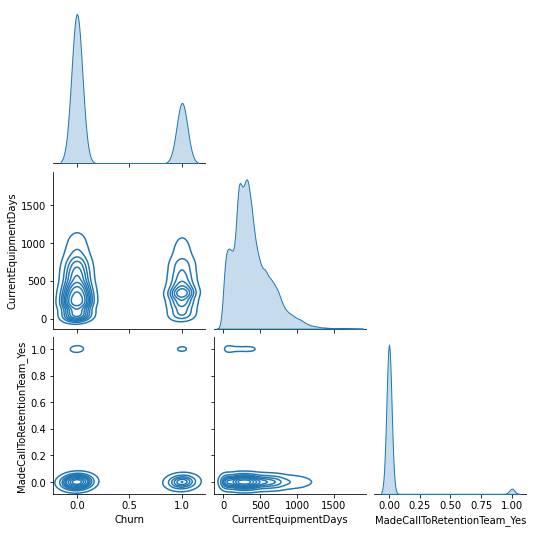

In [37]:
sns.pairplot(data = df_corrs, kind = 'kde', corner = True)

In [38]:
#update df to keep only top 20 correlated features and the label
top_20_w_label = top_20_corr
top_20_w_label.append('Churn')
top_20_w_label

['CurrentEquipmentDays',
 'MadeCallToRetentionTeam_Yes',
 'RetentionCalls',
 'HandsetWebCapable_No',
 'RetentionOffersAccepted',
 'UniqueSubs',
 'HandsetPrice_Unknown',
 'HandsetRefurbished_Yes',
 'MaritalStatus_Unknown',
 'RespondsToMailOffers_No',
 'BuysViaMailOrder_No',
 'CreditRating_3-Good',
 'CreditRating_2-High',
 'CreditRating_1-Highest',
 'MonthsInService',
 'OverageMinutes',
 'ActiveSubs',
 'PrizmCode_Rural',
 'Homeownership_Unknown',
 'PercChangeRevenues',
 'Churn']

In [39]:
df = df[top_20_w_label]

In [40]:
df.shape

(51047, 21)

In [41]:
df.head()

,CurrentEquipmentDays,MadeCallToRetentionTeam_Yes,RetentionCalls,HandsetWebCapable_No,RetentionOffersAccepted,UniqueSubs,HandsetPrice_Unknown,HandsetRefurbished_Yes,MaritalStatus_Unknown,RespondsToMailOffers_No,...,CreditRating_3-Good,CreditRating_2-High,CreditRating_1-Highest,MonthsInService,OverageMinutes,ActiveSubs,PrizmCode_Rural,Homeownership_Unknown,PercChangeRevenues,Churn
0,361.0,1,1,0,0,2,0,0,0,0,...,0,0,1,61,0.0,1,0,0,-19.0,True
1,1504.0,0,0,1,0,1,0,0,0,0,...,0,0,0,58,0.0,1,0,0,0.0,True
2,1812.0,0,0,1,0,1,1,0,0,1,...,1,0,0,60,0.0,1,0,1,0.0,False
3,458.0,0,0,0,0,2,0,0,0,0,...,0,0,0,59,0.0,2,0,0,8.1,False
4,852.0,0,0,1,0,2,0,0,0,0,...,0,0,1,53,0.0,2,0,0,-0.2,True


In [42]:
#handle outliers
float_col = (df.dtypes == float)
float_col

CurrentEquipmentDays            True
MadeCallToRetentionTeam_Yes    False
RetentionCalls                 False
HandsetWebCapable_No           False
RetentionOffersAccepted        False
UniqueSubs                     False
HandsetPrice_Unknown           False
HandsetRefurbished_Yes         False
MaritalStatus_Unknown          False
RespondsToMailOffers_No        False
BuysViaMailOrder_No            False
CreditRating_3-Good            False
CreditRating_2-High            False
CreditRating_1-Highest         False
MonthsInService                False
OverageMinutes                  True
ActiveSubs                     False
PrizmCode_Rural                False
Homeownership_Unknown          False
PercChangeRevenues              True
Churn                          False
dtype: bool

In [43]:
list_float_col = df.columns[float_col].tolist()
list_float_col

['CurrentEquipmentDays', 'OverageMinutes', 'PercChangeRevenues']

In [44]:
for col in list_float_col:
    df.loc[:, col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

In [45]:
#make labeled examples of dataset:
y = df['Churn']
X = df.drop(columns = ['Churn'], axis = 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [47]:
print(X_train.shape)
print(X_test.shape)

(40837, 20)
(10210, 20)


In [48]:
#implement DT models:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf, crit = 'gini'):
    
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
        
    model.fit(X_train, y_train)
   
    class_label_predictions = model.predict(X_test)
    
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score


In [49]:
max_depth_range = [2**i for i in range(8)]
acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md, 1)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=1, accuracy score: 0.7109696376101861
Max Depth=2, accuracy score: 0.7109696376101861
Max Depth=4, accuracy score: 0.7123408423114593
Max Depth=8, accuracy score: 0.7042115572967679
Max Depth=16, accuracy score: 0.6702252693437806
Max Depth=32, accuracy score: 0.6155729676787464
Max Depth=64, accuracy score: 0.6110675808031342
Max Depth=128, accuracy score: 0.6079333986287953


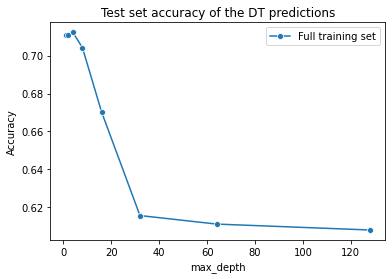

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [51]:
# test DT using grid search to find optimal hyperparameters
# Define the parameter grid
param_grid_DT = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize a decision tree
tree = DecisionTreeClassifier()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid_DT, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy Score: ", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy Score:  0.7124421344252635


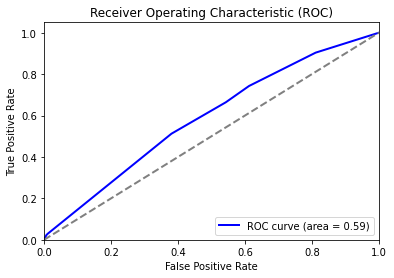

In [52]:
best_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 2)

best_tree.fit(X_train, y_train)

y_prob = best_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [55]:
#implement KNN models (not using a grid search because computationally expensive):
def train_test_knn(X_train, X_test, y_train, y_test, k, weight = 'distance', p_val = 1, metric_val = 'euclidean'):

    model = KNeighborsClassifier(k, weights = weight, p = p_val, metric = metric_val)

    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)

    acc_score = accuracy_score(y_test, prediction)    
    
    return acc_score

In [56]:
k_values = [100, 200, 300]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=100, accuracy score: 0.7106758080313418
k=200, accuracy score: 0.7100881488736532
k=300, accuracy score: 0.7099902056807051


In [57]:
#implement logistic regression:

model_logreg = LogisticRegression(max_iter = 1000)

param_grid_log = {'C': [0.001, 0.1, 1, 10],
                  'penalty':['l1', 'l2'],
                  'solver': ['liblinear']}

grid_search_log = GridSearchCV(estimator=model_logreg, param_grid=param_grid_log, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_log.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best Hyperparameters: {grid_search_log.best_params_}")
print(f"Best Accuracy: {grid_search_log.best_score_:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7121


In [58]:
best_log_model = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'liblinear')

best_log_model.fit(X_train, y_train)

y_pred_proba = best_log_model.predict_proba(X_test)

log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Log Loss on Test Set: {log_loss_value:.4f}")


Log Loss on Test Set: 0.5950


# Conclusions & Analysis:

In this project, a decision tree model did slightly better with an accuracy of 0.7125 vs for KNN model with a accuracy value of  0.7106 vs Logistic Regression Classifier with accuracy value of 0.7121. Performance could improve with implementation of additional steps in data preprocessing.

Project Workflow:
1. Data collection: loading the dataset, inspecting the data
2. Data preprocessing: handling missingness/outliers, one-hot encoding, feature scaling, feature engineering, data splitting.
3. Model building: train multiple models to evaluate best performing model for the problem (DT, KNN, Logistic Regression)
4. Model evaluation + optimization: evaluate on training and testing data, hyperparameter tuning.